In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("customer_segmentation.csv")
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
242,10735,1971,Graduation,Single,22804.0,1,0,31-07-2013,75,14,...,9,0,0,0,0,0,0,3,11,0
246,2176,1972,Graduation,Married,80134.0,1,0,20-05-2013,40,1218,...,6,0,1,1,1,0,0,3,11,1
1027,3628,1987,Basic,Single,15038.0,1,0,29-01-2013,93,4,...,9,0,0,0,0,0,0,3,11,0
1574,8685,1977,Graduation,Married,42014.0,1,0,17-08-2012,56,244,...,8,0,0,0,0,0,0,3,11,1
1869,2186,1977,2n Cycle,Together,82326.0,0,0,10-03-2014,30,938,...,2,0,1,1,1,0,0,3,11,1


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [14]:
df.isna().sum().sum()

np.int64(0)

In [13]:
df.dropna(inplace=True)

In [16]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [18]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [22]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [25]:
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [24]:
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"],dayfirst=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [28]:
df["Age"] = 2025 - df["Year_Birth"]
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [31]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,68,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,71,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,60,0


In [30]:
df['Total_Children'] = df["Kidhome"] + df["Teenhome"]

In [32]:
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [33]:
spend_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [34]:
df['Total_Spending'] = df[spend_cols].sum(axis=1)

In [36]:
df[["Total_Spending"]]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [37]:
df["Customer_Since"] = (pd.Timestamp("today") - df["Dt_Customer"])

In [38]:
df["Customer_Since"]

0      4805 days 18:59:21.037701
1      4255 days 18:59:21.037701
2      4454 days 18:59:21.037701
3      4281 days 18:59:21.037701
4      4303 days 18:59:21.037701
                  ...           
2235   4523 days 18:59:21.037701
2236   4161 days 18:59:21.037701
2237   4297 days 18:59:21.037701
2238   4298 days 18:59:21.037701
2239   4764 days 18:59:21.037701
Name: Customer_Since, Length: 2216, dtype: timedelta64[ns]

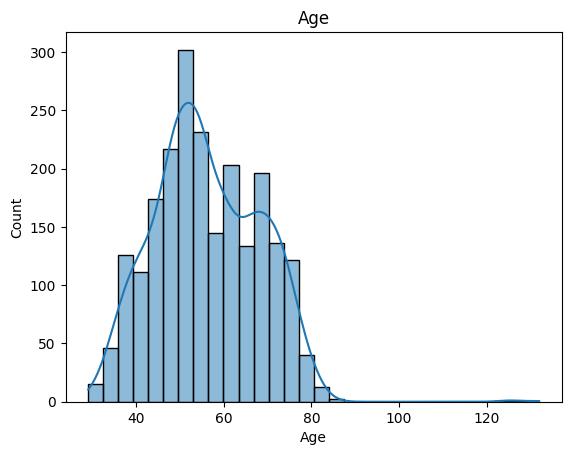

In [43]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age")
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2216 non-null   int64          
 1   Year_Birth           2216 non-null   int64          
 2   Education            2216 non-null   object         
 3   Marital_Status       2216 non-null   object         
 4   Income               2216 non-null   float64        
 5   Kidhome              2216 non-null   int64          
 6   Teenhome             2216 non-null   int64          
 7   Dt_Customer          2216 non-null   datetime64[ns] 
 8   Recency              2216 non-null   int64          
 9   MntWines             2216 non-null   int64          
 10  MntFruits            2216 non-null   int64          
 11  MntMeatProducts      2216 non-null   int64          
 12  MntFishProducts      2216 non-null   int64          
 13  MntSweetProducts     22

In [45]:
df.Age.max()

np.int64(132)

<Axes: xlabel='Income', ylabel='Count'>

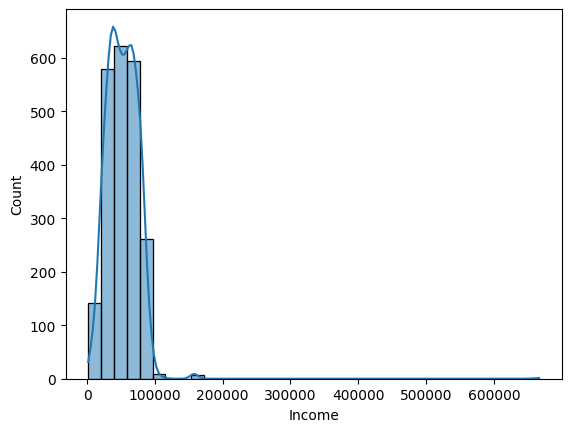

In [46]:
sns.histplot(df['Income'],kde=1, bins=35)

<Axes: xlabel='Total_Spending', ylabel='Count'>

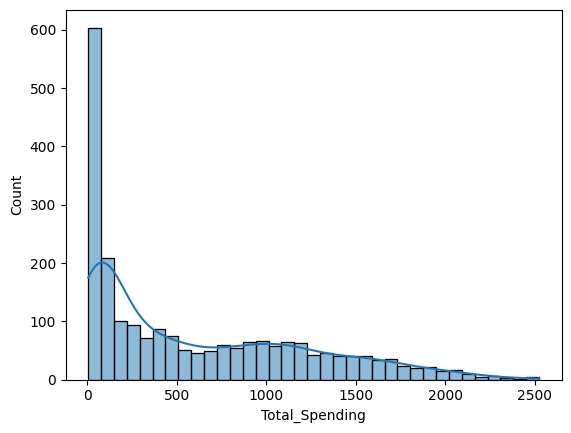

In [49]:
sns.histplot(df["Total_Spending"], kde=1, bins=35)

In [48]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

<Axes: xlabel='Education', ylabel='Marital_Status'>

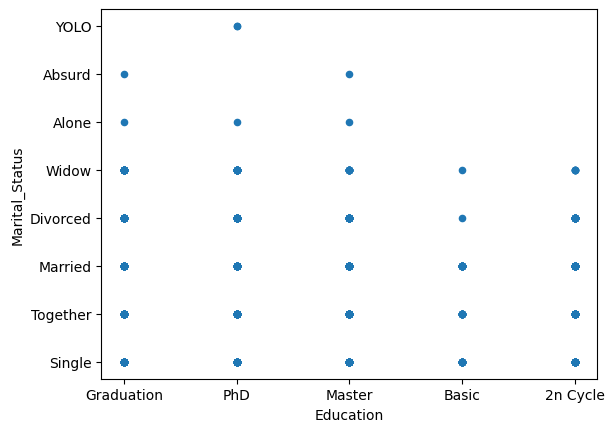

In [50]:
df.plot(kind='scatter', x = 'Education', y = 'Marital_Status')

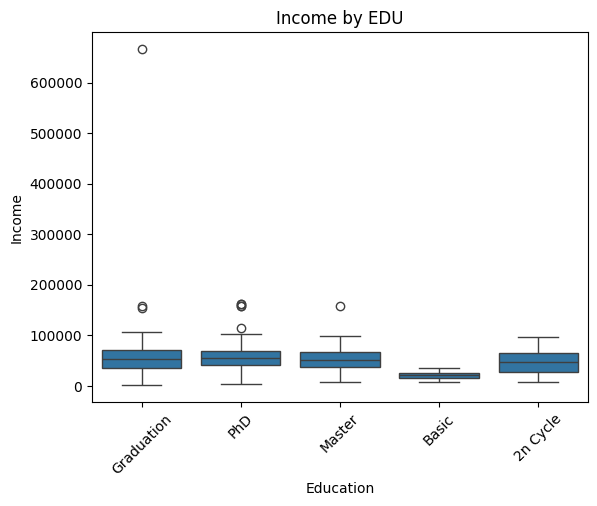

In [51]:
sns.boxplot(x='Education', y = 'Income',data=df)
plt.xticks(rotation=45)
plt.title("Income by EDU")
plt.show()

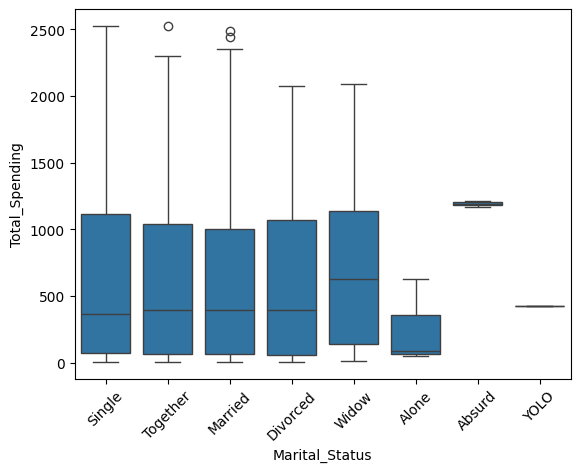

In [52]:
sns.boxplot(x = "Marital_Status", y = "Total_Spending", data=df)
plt.xticks(rotation=45)
plt.show()

In [59]:
# corr = df.select_dtypes(include=["number"])
corr = df[["Income", "Age", "Recency", 
           "Total_Spending","NumWebPurchases",
           "NumStorePurchases",]].corr()

In [60]:
corr.head(3)

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434


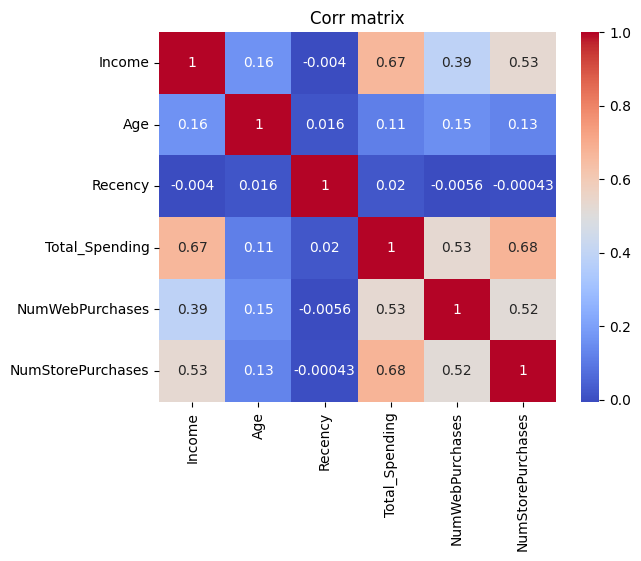

In [61]:
sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.title("Corr matrix")
plt.show()

In [62]:
pivot_income = df.pivot_table(values="Income",index="Education", columns="Marital_Status",aggfunc="mean")

In [63]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'AVG Income by EDU and Marital')

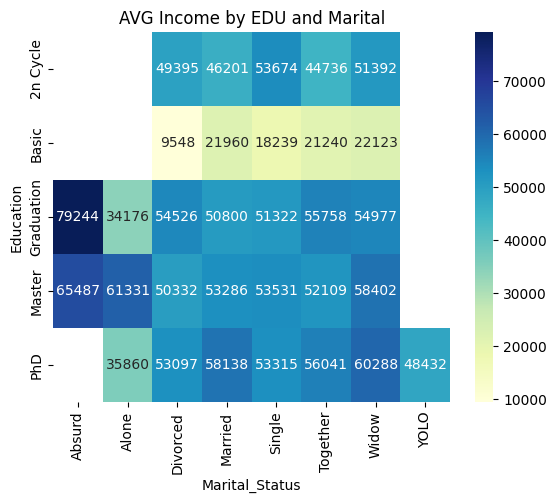

In [64]:
sns.heatmap(pivot_income, annot=True, fmt=".0f",cmap='YlGnBu')
plt.title("AVG Income by EDU and Marital")

In [65]:
group1 = df.groupby("Education")["Total_Spending"].mean().sort_values(ascending=False)

In [66]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

Text(0, 0.5, 'Avg total spending')

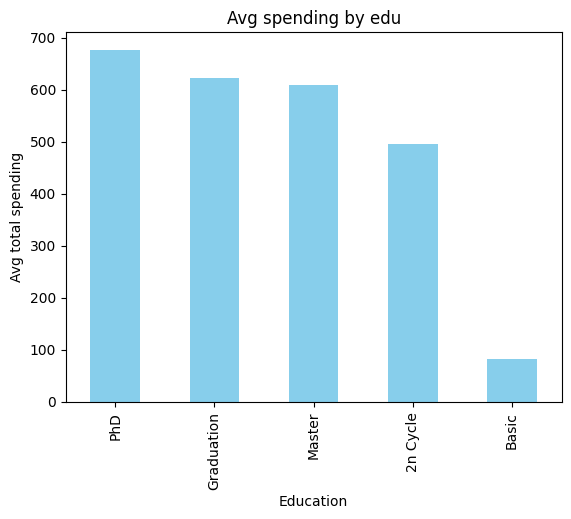

In [67]:
group1.plot(kind="bar", color="skyblue")
plt.title("Avg spending by edu")
plt.ylabel("Avg total spending")

In [84]:
df["TotalAccepted"] = df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [68]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [85]:
df["AcceptedAny"] = (df["TotalAccepted"] > 0).astype(int)

In [87]:
df["AcceptedAny"].unique()

array([1, 0])

In [88]:
group2 = df.groupby("Marital_Status")['AcceptedAny'].mean().sort_values(ascending=False)

In [89]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Absurd'),
  Text(1, 0, 'YOLO'),
  Text(2, 0, 'Widow'),
  Text(3, 0, 'Alone'),
  Text(4, 0, 'Single'),
  Text(5, 0, 'Divorced'),
  Text(6, 0, 'Married'),
  Text(7, 0, 'Together')])

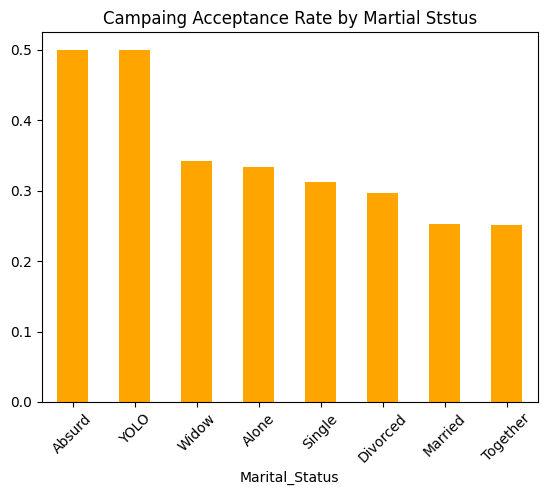

In [91]:
group2.plot(kind="bar", color="orange")
plt.title("Campaing Acceptance Rate by Martial Ststus")
plt.xticks(rotation=45)

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

In [114]:
group3 = df.groupby("AgeGroup")["Income"].mean()

/var/folders/f6/g8yc0mfs44d7fty3dyzw1kdh0000gn/T/ipykernel_9476/1140876350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


Text(0, 0.5, 'age group')

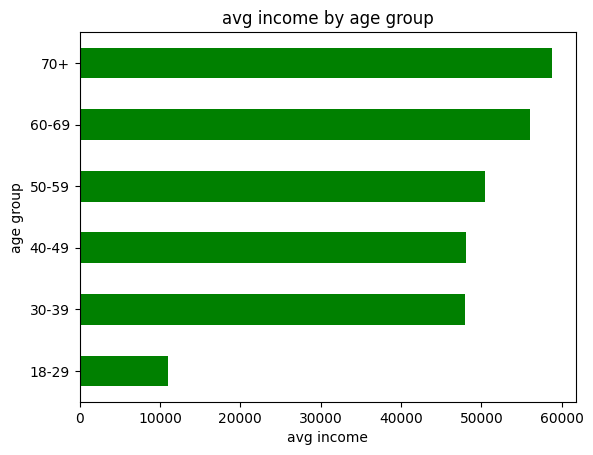

In [118]:
group3.plot(kind='barh', color='g')
plt.title('avg income by age group')
plt.xlabel('avg income')
plt.ylabel('age group')

In [119]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,TotalAccepted,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4805 days 18:59:21.037701,1,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4255 days 18:59:21.037701,0,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4454 days 18:59:21.037701,0,0,60-69


In [121]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'TotalAccepted', 'AgeGroup'],
      dtype='object')

In [123]:
features = ["Age", "Income","Total_Spending", "NumStorePurchases", "NumWebPurchases","NumWebVisitsMonth","Recency"]

In [125]:
X = df[features].copy()
X.head(3)

,Age,Income,Total_Spending,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,4,8,7,58
1,71,46344.0,27,2,1,5,38
2,60,71613.0,776,10,8,4,26


In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [127]:
X_sc = sc.fit_transform(X)

In [128]:
X_sc

array([[ 0.98644293,  0.2340627 ,  1.67548812, ...,  1.42855332,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.12588116,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.42855332,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ..., -0.76096195,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  0.6987149 ,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.39604274,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [129]:
from sklearn.cluster import KMeans

In [130]:
wcss = []

In [131]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_sc)
    wcss.append(kmeans.inertia_)

/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invali

In [133]:
wcss

[10218.620143748783,
 9007.770071045376,
 8239.32218511197,
 7643.241349635184,
 7264.98611578694,
 6950.847575919854,
 6156.111999549243,
 6184.729660741015]

Text(0, 0.5, 'wcss')

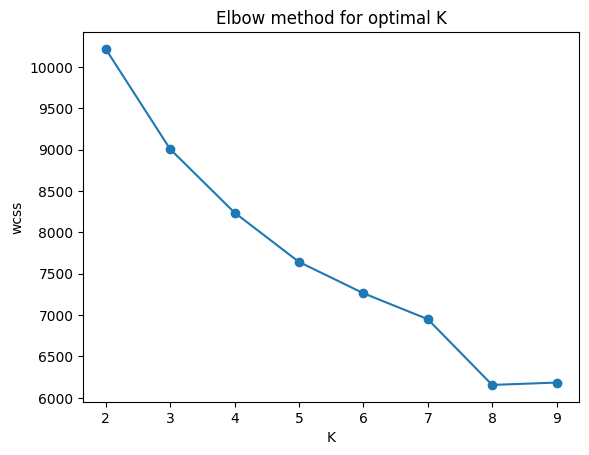

In [134]:
plt.plot(range(2,10),wcss, marker='o')
plt.title('Elbow method for optimal K')
plt.xlabel('K')
plt.ylabel('wcss')

## Elbow with kneed

In [140]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_sc)
    wcss.append(kmeans.inertia_)

/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invali

In [141]:
from kneed import KneeLocator

kl = KneeLocator(K_range, wcss, curve="convex", direction="decreasing")
print("Оптимальное количество кластеров:", kl.elbow)

Оптимальное количество кластеров: 4


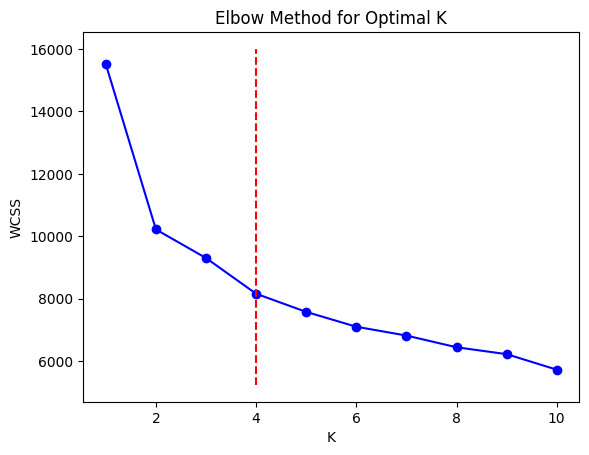

In [178]:
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.savefig('elbow.png')
plt.show()

$$
S = \frac{b - a}{\max(a, b)}
$$ 
a — среднее расстояние до точек своего кластера

b — среднее расстояние до ближайшего другого кластера

S∈[−1,1]: чем ближе к 1 — тем лучше кластеризация

Коэффициент силуэта


In [145]:
from sklearn.metrics import silhouette_score

In [146]:
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X_sc, kmeans.labels_)
    scores.append(score)

/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invali

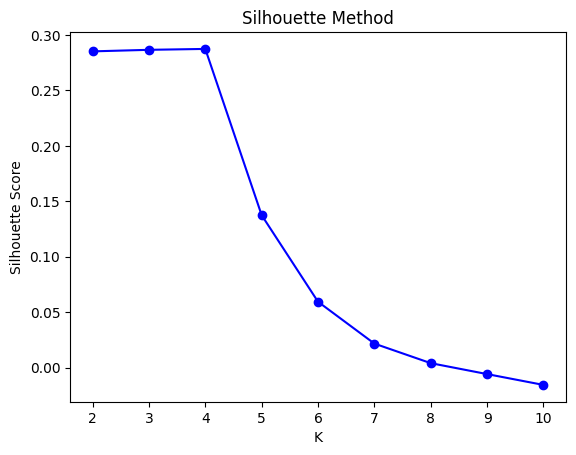

In [177]:
plt.plot(range(2, 11), scores, 'bo-')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.savefig("Silhouette_method.png")
plt.show()

после наблюдение через Elbow and Коэф силуэта при k > 5 нету смысла 

In [159]:
kmeans = KMeans(n_clusters=4)
df["Cluster"] = kmeans.fit_predict(X_sc)

/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invali

In [160]:
df.Cluster

0       3
1       1
2       2
3       1
4       3
       ..
2235    3
2236    3
2237    0
2238    2
2239    1
Name: Cluster, Length: 2216, dtype: int32

In [161]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,TotalAccepted,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,68,0,1617,4805 days 18:59:21.037701,1,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,71,2,27,4255 days 18:59:21.037701,0,0,70+,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,60,0,776,4454 days 18:59:21.037701,0,0,60-69,2


In [162]:
cluster_summary = df.groupby("Cluster")[features].mean()

In [163]:
cluster_summary

,Age,Income,Total_Spending,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,58.007673,77327.907928,1251.063939,8.258312,4.340153,2.439898,70.191816
1,53.693501,34143.465567,103.195926,3.191077,2.123181,6.529583,49.035887
2,56.731507,70641.424658,1100.498630,8.641096,5.200000,3.504110,18.873973
3,60.018648,57246.303030,811.272727,7.417249,7.620047,6.578089,55.296037


In [165]:
df.Age.describe()

count    2216.000000
mean       56.179603
std        11.985554
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

In [167]:
df['Cluster'].value_counts()

Cluster
1    1031
3     429
0     391
2     365
Name: count, dtype: int64

In [168]:
from sklearn.decomposition import PCA

In [169]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_sc)
df["PCA1"], df['PCA2'] = pca_data[:,0], pca_data[:,1]

/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/nurasyk/Desktop/python/ML/core/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [170]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]], shape=(2216, 2))

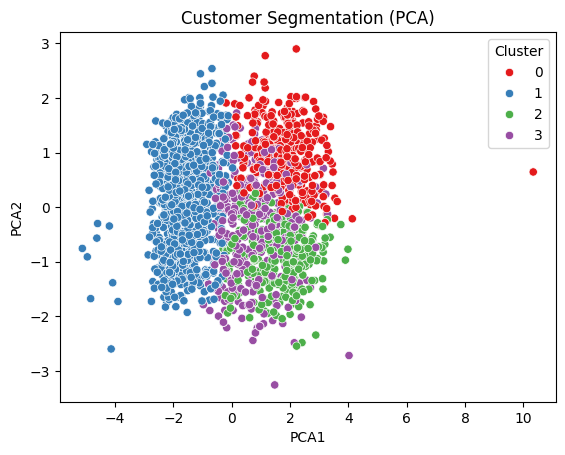

In [179]:
sns.scatterplot(x='PCA1', y='PCA2',hue='Cluster', data = df, palette='Set1')
plt.title('Customer Segmentation (PCA)')
plt.savefig('pca.png')
plt.show()

In [173]:
cluster_summary

,Age,Income,Total_Spending,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,58.007673,77327.907928,1251.063939,8.258312,4.340153,2.439898,70.191816
1,53.693501,34143.465567,103.195926,3.191077,2.123181,6.529583,49.035887
2,56.731507,70641.424658,1100.498630,8.641096,5.200000,3.504110,18.873973
3,60.018648,57246.303030,811.272727,7.417249,7.620047,6.578089,55.296037


Кластер 0 — “Богатые, но неактивные”

💰 Высокий доход (77K) и большие траты (1250).

👴 Старше среднего (58 лет).

🛒 Активны в офлайн-магазинах, реже в интернете.

📅 Высокий показатель Recency (70) → давно не покупали.
🔹 Вероятно: старшие клиенты с хорошим доходом, но снизили активность.
🎯 Рекомендация: напомнить о бренде (email-кампании, бонусы за возвращение).

🟠 Кластер 1 — “Малообеспеченные, неактивные”

💰 Низкий доход (34K), минимальные траты (103).

🛒 Мало покупают везде, часто заходят на сайт (6.5 посещений).

📅 Средний Recency (49) → покупали давно.
🔹 Вероятно: клиенты с низкой покупательной способностью, интересуются, но не покупают.
🎯 Рекомендация: акции, рассрочка, персональные предложения.

Кластер 2 — “Постоянные активные покупатели”

💰 Высокий доход (70K) и крупные траты (1100).

🛒 Часто покупают и в магазине, и онлайн.

📅 Низкий Recency (18.9) → недавно покупали.
🔹 Это идеальные клиенты: лояльные, богатые и активные.
🎯 Рекомендация: программы лояльности, VIP-акции, удержание.

Кластер 3 — “Онлайн-активные среднего уровня”

💰 Средний доход (57K), траты тоже средние (811).

🛒 Очень активны онлайн (7.6 веб-покупок, 6.6 визитов).

📅 Recency высокий (55) → активность снизилась.
🔹 Цифрово-ориентированные клиенты, но нужно вернуть интерес.
🎯 Рекомендация: ремаркетинг, email-кампании с персональными предложениями.

### REVIEW

Кластер 2 — самые ценные клиенты (высокий доход, активность, низкий Recency).

Кластер 0 — “спящие” богатые клиенты, можно вернуть.

Кластер 3 — онлайн-активные, но охладели к покупкам.

Кластер 1 — низкоприоритетная аудитория по доходу и активности.

In [175]:
import joblib

In [176]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(sc, "scaler.pkl")

['scaler.pkl']